In [54]:
import pandas as pd

In [55]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'plug_your_own_here',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [56]:
#see all columns

pd.set_option('display.max_columns', None)

In [57]:
#check the data type

type(data)

dict

In [58]:
#display the data

df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9531,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906764e+07,1.906764e+07,NaN,1,NaN,NaN,2022-06-15T01:16:00.000Z,21949.384159,4.838315e+10,-28.3725,-0.025846,1.035351,-29.135060,-29.107547,-45.887332,-46.402211,4.185229e+11,44.7941,4.609371e+11,2022-06-15T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5748,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211746e+08,1.211746e+08,NaN,2,NaN,NaN,2022-06-15T01:16:00.000Z,1200.689740,3.192096e+10,-27.4628,0.156747,1.917614,-33.454971,-43.182035,-60.523901,-56.538201,1.454931e+11,15.5720,1.454931e+11,2022-06-15T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.159913e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-15T01:16:00.000Z,0.998939,7.801515e+10,-26.3636,0.004229,0.019672,-0.040067,0.000732,-0.126032,-0.146439,7.152315e+10,7.6551,7.962604e+10,2022-06-15T01:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4417,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.408696e+10,5.408696e+10,NaN,4,NaN,NaN,2022-06-15T01:15:00.000Z,1.000352,8.816962e+09,-35.3349,0.026043,0.016014,-0.001837,0.022045,0.054215,0.045886,5.410599e+10,5.7925,5.410599e+10,2022-06-15T01:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-15T01:15:00.000Z,221.577656,1.965347e+09,-19.5049,0.149232,2.571002,-23.541271,-27.705084,-46.931781,-42.234532,3.617853e+10,3.8795,3.658618e+10,2022-06-15T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3840,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.742253e+10,1.742253e+10,NaN,6,NaN,NaN,2022-06-15T01:16:00.000Z,1.001799,7.167594e+09,-36.2520,0.025958,0.209280,0.050834,0.231799,0.085365,0.171643,1.745388e+10,1.8681,1.745388e+10,2022-06-15T01:16:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.451285e+10,NaN,7,NaN,NaN,2022-06-15T01:15:00.000Z,0.482153,2.170494e+09,-11.7617,0.869142,6.267124,-21.454605,-19.620919,-49.615980,-42.238992,1.627390e+10,1.7451,2.169689e+10,2022-06-15T01:15:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47
7,52,XRP,XRP,xrp,738,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-15T01:16:00.000Z,0.319807,1.892716e+09,-24.9314,0.051925,5.000419,-21.398454,-27.909278,-59.780943,-59.636511,1.546047e+10,1.6547,3.198071e+10,2022-06-15T01:16:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe
8,5426,Solana,SOL,solana,329,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.422100e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-15T01:15:00.000Z,29.597781,2.226104e+09,-12.2641,0.353258,7.468655,-24.232460,-47.850834,-70.867379,-66.052487,1.012866e+10,1.0861,1.514273e+10,2022-06-15T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN
9,6636,Polkadot,DOT,polkadot-new,351

In [59]:
#add a timestamp column

df['timestamp']= pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9531,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.906764e+07,1.906764e+07,NaN,1,NaN,NaN,2022-06-15T01:16:00.000Z,21949.384159,4.838315e+10,-28.3725,-0.025846,1.035351,-29.135060,-29.107547,-45.887332,-46.402211,4.185229e+11,44.7941,4.609371e+11,2022-06-15T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:16:47.568245
1,1027,Ethereum,ETH,ethereum,5748,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211746e+08,1.211746e+08,NaN,2,NaN,NaN,2022-06-15T01:16:00.000Z,1200.689740,3.192096e+10,-27.4628,0.156747,1.917614,-33.454971,-43.182035,-60.523901,-56.538201,1.454931e+11,15.5720,1.454931e+11,2022-06-15T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:16:47.568245
2,825,Tether,USDT,tether,34681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.159913e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-15T01:16:00.000Z,0.998939,7.801515e+10,-26.3636,0.004229,0.019672,-0.040067,0.000732,-0.126032,-0.146439,7.152315e+10,7.6551,7.962604e+10,2022-06-15T01:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-15 01:16:47.568245
3,3408,USD Coin,USDC,usd-coin,4417,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.408696e+10,5.408696e+10,NaN,4,NaN,NaN,2022-06-15T01:15:00.000Z,1.000352,8.816962e+09,-35.3349,0.026043,0.016014,-0.001837,0.022045,0.054215,0.045886,5.410599e+10,5.7925,5.410599e+10,2022-06-15T01:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-15 01:16:47.568245
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-15T01:15:00.000Z,221.577656,1.965347e+09,-19.5049,0.149232,2.571002,-23.541271,-27.705084,-46.931781,-42.234532,3.617853e+10,3.8795,3.658618e+10,2022-06-15T01:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:16:47.568245


In [60]:
#create a function

def api_runner():

  global df #declare a global var to avoid a local variable error

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'10',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '82622b80-83bc-4c95-8243-4a1eeab7ca7b',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(data['data'])
  df2['timestamp']= pd.to_datetime('now')
  df = df.append(df2)  #append the data to the df



In [61]:
#running the function

import os
from time import time
from time import sleep

for i in range(333): #333 runs of api limit a day
  api_runner()
  print('API runner completed')
  sleep(30) #set the time you want, for me is to run every 30 seconds
exit()

API runner completed
API runner completed
API runner completed


KeyboardInterrupt: ignored

In [66]:
#check if the the function runs properly 

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9531,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906764e+07,1.906764e+07,NaN,1,NaN,NaN,2022-06-15T01:26:00.000Z,21952.732584,4.813034e+10,-28.5598,-0.354443,1.828137,-29.251156,-29.025463,-45.947388,-46.323720,4.185867e+11,44.7307,4.610074e+11,2022-06-15T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:26:31.256927
1,1027,Ethereum,ETH,ethereum,5748,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211746e+08,1.211746e+08,NaN,2,NaN,NaN,2022-06-15T01:25:00.000Z,1200.171717,3.180132e+10,-27.2186,-0.308470,2.766451,-33.779772,-43.119217,-60.583754,-56.502694,1.454304e+11,15.5369,1.454304e+11,2022-06-15T01:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:26:31.256927
2,825,Tether,USDT,tether,34681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.159913e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-15T01:25:00.000Z,0.998931,7.771884e+10,-26.3837,-0.002630,0.016161,-0.039152,-0.001830,-0.132789,-0.148997,7.152261e+10,7.6411,7.962543e+10,2022-06-15T01:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-15 01:26:31.256927
3,3408,USD Coin,USDC,usd-coin,4417,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.408696e+10,5.408696e+10,NaN,4,NaN,NaN,2022-06-15T01:25:00.000Z,1.000320,8.772516e+09,-35.5617,0.005248,0.027472,0.005237,0.011951,0.043974,0.059523,5.410425e+10,5.7806,5.410425e+10,2022-06-15T01:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-15 01:26:31.256927
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-15T01:25:00.000Z,221.594612,1.957380e+09,-19.3741,-0.251514,3.626371,-23.768956,-27.688571,-47.017870,-42.073316,3.618130e+10,3.8654,3.658898e+10,2022-06-15T01:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-15 01:26:31.256927
5,4687,Binance USD,BUSD,binance-usd,3840,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.742253e+10,1.742253e+10,NaN,6,NaN,NaN,2022-06-15T01:26:00.000Z,0.999609,7.127472e+09,-36.2862,-0.142568,0.075993,-0.177651,-0.036191,-0.129949,0.087032,1.741572e+10,1.8611,1.741572e+10,2022-06-15T01:26:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-15 01:26:31.256927
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.451285e+10,NaN,7,NaN,NaN,2022-06-15T01:25:00.000Z,0.481503,2.161396e+09,-11.5701,-0.239928,6.599300,-21.886915,-19.736750,-49.790767,-42.218588,1.625195e+10,1.7363,2.166762e+10,2022-06-15T01:25:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-15 01:26:31.256927
7,52,XRP,XRP,xrp,738,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-15T01:26:00.000Z,0.320575,1.885550e+09,-24.8950,0.212727,5.811886,-21.257830,-27.855090,-59.675698,-59.419787,1.549758e+10,1.6561,3.205748e+10,2022-06-15T01:26:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-15 01:26:31.256927
8,5426,Solana,SOL,solana,329,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.422100e+08,5.116169e+08,NaN,9,NaN,NaN

In [68]:
#format the number to more readable

pd.set_option('display.float_format', lambda x: '%.5f' % x)



In [74]:
#group the cryptos avg percentage change

df_group = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
df_group

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.35444,1.82814,-29.25116,-29.02546,-45.94739,-46.32372
Ethereum,-0.30847,2.76645,-33.77977,-43.11922,-60.58375,-56.50269
Tether,-0.00263,0.01616,-0.03915,-0.00183,-0.13279,-0.14900
USD Coin,0.00525,0.02747,0.00524,0.01195,0.04397,0.05952
BNB,-0.25151,3.62637,-23.76896,-27.68857,-47.01787,-42.07332
Binance USD,-0.14257,0.07599,-0.17765,-0.03619,-0.12995,0.08703
Cardano,-0.23993,6.59930,-21.88691,-19.73675,-49.79077,-42.21859
XRP,0.21273,5.81189,-21.25783,-27.85509,-59.67570,-59.41979
Solana,-0.33373,8.77896,-24.18383,-47.85079,-70.87816,-66.03416


In [76]:
# stack it to for better visualization

df_group_stack = df_group.stack()
df_group_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.35444
             quote.USD.percent_change_24h     1.82814
             quote.USD.percent_change_7d    -29.25116
             quote.USD.percent_change_30d   -29.02546
             quote.USD.percent_change_60d   -45.94739
             quote.USD.percent_change_90d   -46.32372
Ethereum     quote.USD.percent_change_1h     -0.30847
             quote.USD.percent_change_24h     2.76645
             quote.USD.percent_change_7d    -33.77977
             quote.USD.percent_change_30d   -43.11922
             quote.USD.percent_change_60d   -60.58375
             quote.USD.percent_change_90d   -56.50269
Tether       quote.USD.percent_change_1h     -0.00263
             quote.USD.percent_change_24h     0.01616
             quote.USD.percent_change_7d     -0.03915
             quote.USD.percent_change_30d    -0.00183
             quote.USD.percent_change_60d    -0.13279
             quote.USD.percent_change_90

In [77]:
type(df_group)

pandas.core.frame.DataFrame

In [78]:
type(df_group_stack)

pandas.core.series.Series

In [79]:
#Turn the series back to df
df_group_stack = df_group_stack.to_frame(name='values')
df_group_stack

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.35444
            quote.USD.percent_change_24h   1.82814
            quote.USD.percent_change_7d  -29.25116
            quote.USD.percent_change_30d -29.02546
            quote.USD.percent_change_60d -45.94739
            quote.USD.percent_change_90d -46.32372
Ethereum    quote.USD.percent_change_1h   -0.30847
            quote.USD.percent_change_24h   2.76645
            quote.USD.percent_change_7d  -33.77977
            quote.USD.percent_change_30d -43.11922
            quote.USD.percent_change_60d -60.58375
            quote.USD.percent_change_90d -56.50269
Tether      quote.USD.percent_change_1h   -0.00263
            quote.USD.percent_change_24h   0.01616
            quote.USD.percent_change_7d   -0.03915
            quote.USD.percent_change_30d  -0.00183
            quote.USD.percent_change_60d  -0.13279
            quote.USD.percent_change_90d  -0.14900
USD Coin    quote.USD.percent_change_1h    0.00525
            quote.USD.percent_change_24h   0.02747
            quote.USD.percent_change_7d    0.00524
            quote.USD.percent_change_30d   0.01195
            quote.USD.percent_change_60d   0.04397
            quote.USD.percent_change_90d   0.05952
BNB         quote.USD.percent_change_1h   -0.25151
            quote.USD.percent_change_24h   3.62637
            quote.USD.percent_change_7d  -23.76896
            quote.USD.percent_change_30d -27.68857
            quote.USD.percent_change_60d -47.01787
            quote.USD.percent_change_90d -42.07332
Binance USD quote.USD.percent_change_1h   -0.14257
            quote.USD.percent_change_24h   0.07599
            quote.USD.percent_change_7d   -0.17765
            quote.USD.percent_change_30d  -0.03619
            quote.USD.percent_change_60d  -0.12995
            quote.USD.percent_change_90d   0.08703
Cardano     quote.USD.percent_change_1h   -0.23993
            quote.USD.percent_change_24h   6.59930
            quote.USD.percent_change_7d  -21.88691
            quote.USD.percent_change_30d -19.73675
            quote.USD.percent_change_60d -49.79077
            quote.USD.percent_change_90d -42.21859
XRP         quote.USD.percent_change_1h    0.21273
            quote.USD.percent_change_24h   5.81189
            quote.USD.percent_change_7d  -21.25783
            quote.USD.percent_change_30d -27.85509
            quote.USD.percent_change_60d -59.67570
            quote.USD.percent_change_90d -59.41979
Solana      quote.USD.percent_change_1h   -0.33373
            quote.USD.percent_change_24h   8.77896
            quote.USD.percent_change_7d  -24.18383
            quote.USD.percent_change_30d -47.85079
            quote.USD.percent_change_60d -70.87816
            quote.USD.percent_change_90d -66.03416
Polkadot    quote.USD.percent_change_1h    1.08403
            quote.USD.percent_change_24h   9.74619
            quote.USD.percent_change_7d  -18.92290
            quote.USD.percent_change_30d -34.63433
            quote.USD.percent_change_60d -59.71454
            quote.USD.percent_change_90d -60.20704

In [80]:
#Create the index to format the df properly

index= pd.Index(range(90))

df_group_stack = df_group_stack.reset_index()
df_group_stack

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.35444
1,Bitcoin,quote.USD.percent_change_24h,1.82814
2,Bitcoin,quote.USD.percent_change_7d,-29.25116
3,Bitcoin,quote.USD.percent_change_30d,-29.02546
4,Bitcoin,quote.USD.percent_change_60d,-45.94739
5,Bitcoin,quote.USD.percent_change_90d,-46.32372
6,Ethereum,quote.USD.percent_change_1h,-0.30847
7,Ethereum,quote.USD.percent_change_24h,2.76645
8,Ethereum,quote.USD.percent_change_7d,-33.77977
9,Ethereum,quote.USD.percent_change_30d,-43.11922


In [84]:
df_group_stack = df_group_stack.rename(columns={'level_1':'percent_change'})
df_group_stack

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.35444
1,Bitcoin,quote.USD.percent_change_24h,1.82814
2,Bitcoin,quote.USD.percent_change_7d,-29.25116
3,Bitcoin,quote.USD.percent_change_30d,-29.02546
4,Bitcoin,quote.USD.percent_change_60d,-45.94739
5,Bitcoin,quote.USD.percent_change_90d,-46.32372
6,Ethereum,quote.USD.percent_change_1h,-0.30847
7,Ethereum,quote.USD.percent_change_24h,2.76645
8,Ethereum,quote.USD.percent_change_7d,-33.77977
9,Ethereum,quote.USD.percent_change_30d,-43.11922


##Visualization

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


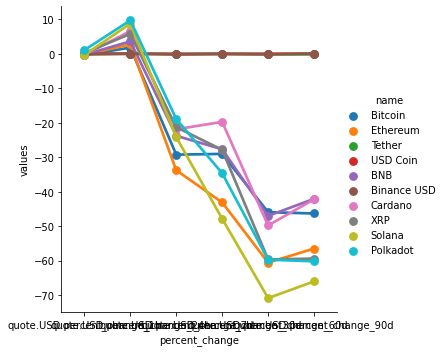

In [88]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_group_stack, kind='point')

In [95]:
#change column names so display better
df_group_stack['percent_change'] = df_group_stack['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ],['1h','24h','7d','30d','60d','90d'])
df_group_stack.head(10)


,name,percent_change,values
0,Bitcoin,1h,-0.35444
1,Bitcoin,24h,1.82814
2,Bitcoin,7d,-29.25116
3,Bitcoin,30d,-29.02546
4,Bitcoin,60d,-45.94739
5,Bitcoin,90d,-46.32372
6,Ethereum,1h,-0.30847
7,Ethereum,24h,2.76645
8,Ethereum,7d,-33.77977
9,Ethereum,30d,-43.11922


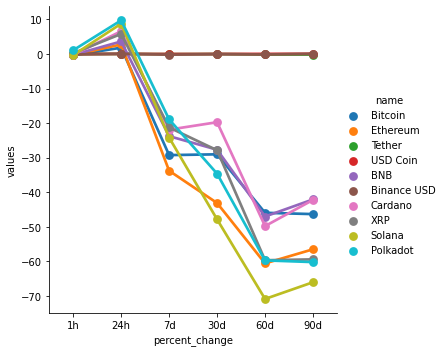

In [96]:
#Run seaborn plot again
sns.catplot(x='percent_change', y='values', hue='name', data=df_group_stack, kind='point')

In [99]:
df_group_pick = df[['name','quote.USD.price','timestamp']]
df_group_pick.head()

,name,quote.USD.price,timestamp
0,Bitcoin,21952.73258,2022-06-15 01:26:31.256927
1,Ethereum,1200.17172,2022-06-15 01:26:31.256927
2,Tether,0.99893,2022-06-15 01:26:31.256927
3,USD Coin,1.00032,2022-06-15 01:26:31.256927
4,BNB,221.59461,2022-06-15 01:26:31.256927


In [101]:
df_group_pick = df_group_pick.query("name == 'Bitcoin'")
df_group_pick

,name,quote.USD.price,timestamp
0,Bitcoin,21952.73258,2022-06-15 01:26:31.256927
0,Bitcoin,21952.73258,2022-06-15 01:26:31.256927


ValueError: ignored

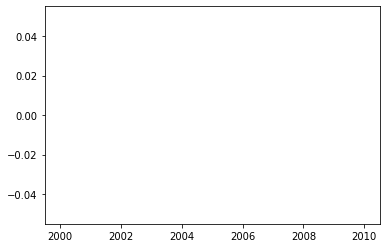

In [102]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_group_pick)

In [105]:
#Contains a duplicate value so cannot plot the sns lineplot. Try to see where is the duplicate value (perhaps price is run too closely in the time series)

df_group_pick[df_group_pick.index.duplicated()]

,name,quote.USD.price,timestamp
0,Bitcoin,21952.73258,2022-06-15 01:26:31.256927


##Save to csv

In [65]:
#create a function

def api_runner():

  global df #declare a global var to avoid a local variable error

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'10',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'plug_your_own_here',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df = pd.json_normalize(data['data'])
  df['timestamp']= pd.to_datetime('now')
  df = df.append(df)  #append the data to the df

  #check if there is a file under this name. If the file not exist, write the data and create a new csv
  if not os.path.isfile(r'C:\Users\xteni\Desktop\School\Projects\API.csv'): 
    df.to_csv(r'C:\Users\xteni\Desktop\School\Projects\API.csv', header='column_names')
  #if the file exist, then append the data only
  else: 
    df.to_csv(r'C:\Users\xteni\Desktop\School\Projects\API.csv', mode='a', header=False)

In [64]:
for i in range(333): #333 runs of api limit a day
  api_runner()
  print('API runner completed')
  sleep(10) #set the time you want, for me is to run every 10 seconds
exit()

API runner completed
API runner completed


KeyboardInterrupt: ignored